In [13]:
# This notebook calculates the similarity between the training set and
# the validation set as a function of the percentage of data that is
# taken as the validation set.

# We consider both the case that space-separated words and that entire
# verses are taken as the input tokens.

# These are the frequencies of the space-separated words from t-in_voc.
# The tuples (n,k) are to be interpreted as: there are n distinct
# tokens which occur k times.

word_freqs = [(30263,1), (8099,2), (3572,3), (2051,4), (1346,5),
   (947,6), (708,7), (491,8), (415,9), (343,10), (273,11), (268,12),
   (210,13), (185,14), (184,15), (138,16), (110,17), (105,18),
   (110,19), (91,20), (74,21), (71,22), (62,23), (69,24), (67,25),
   (58,26), (49,27), (41,28), (35,29), (50,30), (48,31), (50,32),
   (24,33), (38,34), (31,35), (30,36), (25,37), (38,38), (37,39),
   (12,40), (20,41), (18,42), (22,43), (17,44), (9,45), (20,46),
   (17,47), (18,48), (13,49), (21,50), (18,51), (18,52), (15,53),
   (9,54), (9,55), (13,56), (4,57), (14,58), (7,59), (10,60), (8,61),
   (7,62), (6,63), (8,64), (7,65), (8,66), (9,67), (5,68), (7,69),
   (7,70), (6,71), (5,72), (8,73), (8,74), (7,75), (5,76), (2,77),
   (6,78), (9,79), (6,80), (8,81), (2,82), (6,83), (4,84), (6,85),
   (4,86), (2,87), (6,88), (6,89), (5,90), (5,91), (5,92), (3,93),
   (3,94), (2,95), (3,96), (6,97), (3,98), (5,99), (6,100), (1,101),
   (2,102), (3,103), (3,104), (7,105), (6,106), (4,107), (2,108),
   (3,109), (6,110), (6,111), (2,112), (5,113), (1,114), (4,115),
   (3,116), (1,117), (3,118), (2,119), (3,120), (4,121), (3,122),
   (2,123), (3,124), (1,125), (2,126), (4,128), (2,129), (2,130),
   (4,131), (3,132), (1,133), (3,134), (1,135), (2,136), (3,138),
   (7,139), (1,140), (1,142), (1,143), (1,144), (1,146), (3,147),
   (2,148), (1,150), (1,151), (2,153), (1,154), (1,155), (4,156),
   (3,157), (2,158), (1,159), (1,161), (2,162), (2,163), (2,165),
   (3,166), (3,167), (2,168), (1,170), (2,171), (1,172), (3,173),
   (3,174), (1,175), (2,178), (1,179), (2,180), (1,182), (1,183),
   (3,184), (2,185), (1,187), (3,188), (1,190), (1,191), (3,192),
   (2,193), (1,194), (1,195), (1,196), (2,197), (1,199), (1,200),
   (2,201), (1,202), (1,204), (2,205), (1,206), (1,207), (1,210),
   (1,211), (2,212), (1,213), (1,215), (2,217), (1,219), (1,220),
   (2,221), (1,226), (3,229), (1,235), (2,239), (2,240), (2,241),
   (2,242), (1,243), (1,247), (1,248), (1,249), (1,255), (1,263),
   (1,266), (3,269), (2,270), (1,271), (4,273), (1,279), (1,280),
   (2,282), (1,284), (1,289), (1,290), (1,293), (1,295), (2,297),
   (2,301), (1,311), (1,313), (2,320), (1,325), (2,333), (1,334),
   (2,335), (1,344), (2,355), (1,357), (1,358), (1,359), (1,365),
   (1,366), (1,372), (1,379), (1,394), (1,395), (2,398), (1,403),
   (1,414), (2,420), (1,429), (1,435), (1,438), (1,440), (1,441),
   (1,443), (1,447), (1,458), (1,466), (1,470), (1,472), (1,481),
   (1,486), (1,489), (1,508), (1,515), (1,572), (1,578), (1,587),
   (1,595), (1,602), (1,606), (1,619), (1,620), (1,638), (1,679),
   (1,683), (1,696), (1,699), (1,726), (1,743), (1,782), (1,787),
   (1,856), (1,861), (1,862), (1,900), (1,934), (1,1024), (1,1027),
   (1,1043), (1,1130), (1,1228), (1,1284), (1,1577), (1,1795),
   (1,1945), (1,2259), (1,2558), (1,3231), (1,3477), (1,3540),
   (1,4343), (1,4807), (1,5657), (1,6716)]

# Check whether everything adds up.
print('Total number of words:',
   sum([t[0] * t[1] for t in word_freqs]))

Total number of words: 300676


In [14]:
# These are the frequencies when the tokens are entire verses.
verse_freqs = [(22492,1), (116,2), (4,3), (5,4), (1,5), (3,9), (1,10),
   (3,12), (1,44), (1,68)]

# Check again whether everything adds up.
print('Total number of verses:',
   sum([t[0] * t[1] for t in verse_freqs]))

Total number of verses: 22946


In [15]:
# Performing a theoretical calculation of the average similarity using
# combinatorics is a hypergeometric nightmare (if at all feasible).
# We therefore use a Monte Carlo simulation.

from numpy import array, intersect1d
from numpy.random import shuffle

# Represent all input forms by a ball of a distinctive colour
def colour_balls(freqs):
   l = []
   color = 0
   for f in freqs:
      for i in range(f[0]):
         for j in range(f[1]):
            l.append(color)
         color += 1
   return array(l)

In [16]:
# The x-axis represents the size of the validation set as a percentage
# of the data set. It ranges from 0 to p_max.
p_max = 100

# During the simulation the data is shuffled and partitioned into
# a training and a validation set. Then the cardinality of the
# intersection of the two sets is determined and the Jaccard similarity
# is calculated. This is repeated n_trials times. The mean and sample
# standard deviation of the outcomes are stored. This is done for all
# integral percentages between 0 and p_max.

# Number of Monte Carlo trials
n_trials = 32

def MonteCarloSimulation(data):
   means = [0]
   stddev = [0]
   for p in range(1, p_max):
      r = int(p/100 * len(data))
      sample = []
      for i in range(n_trials):
         shuffle(data)
         train = array(data[r:])
         valid = array(data[:r])
         inter = len(intersect1d(train, valid))
         js = inter / (len(train) + len(valid) - inter)
         sample.append(js)
      means.append(array(sample).mean())
      stddev.append(array(sample).std(ddof=1))
   return array(means), array(stddev)

In [17]:
from matplotlib import pyplot as plot

def plot_graph(freqs):
   data = colour_balls(freqs)
   means, stddev = MonteCarloSimulation(data)
   print('Maximum similarity is', means.max())
   plot.errorbar(range(p_max), means, stddev,
      linestyle='None', marker='.')
   plot.xlabel('Validation set percentage')
   plot.ylabel('Jaccard similarity between sets')
   plot.show()

Maximum similarity is 0.05649527411807131


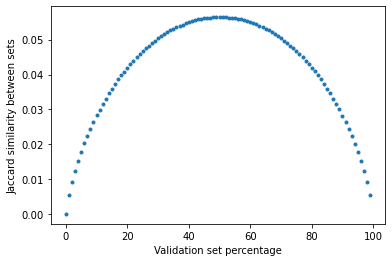

In [18]:
plot_graph(word_freqs)

Maximum similarity is 0.0033492275877352864


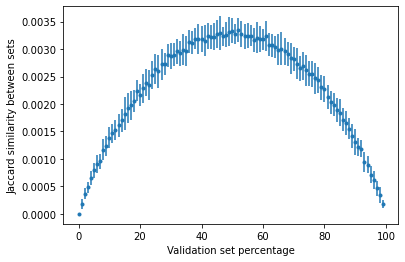

In [19]:
plot_graph(verse_freqs)